In [ ]:
import numpy as np
import pandas as pd

import os   #to walk through the '/kaggle/input' directory and print out the names of all the files located in that directory.
#  This is done using a 'for' loop to iterate through each directory, filename, and subdirectory.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results written to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os


zip_path = "/content/drive/MyDrive/CIC-IDS2017.zip"
extract_path = "CIC-IDS2017"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")

Dataset extracted to CIC-IDS2017


In [ ]:
dataset_folder = "CIC-IDS2017"
print("📂 Extracted files:", os.listdir(dataset_folder))

📂 Extracted files: ['Bruteforce-Tuesday-no-metadata.parquet', 'Botnet-Friday-no-metadata.parquet', 'WebAttacks-Thursday-no-metadata.parquet', 'Portscan-Friday-no-metadata.parquet', 'Infiltration-Thursday-no-metadata.parquet', 'DoS-Wednesday-no-metadata.parquet', 'Benign-Monday-no-metadata.parquet', 'DDoS-Friday-no-metadata.parquet']


In [ ]:
import os

print("📂 List of folders in the current directory:")
print(os.listdir("/content/"))  # Check the main directory

📂 List of folders in the current directory:
['.config', 'drive', 'CIC-IDS2017', 'sample_data']


In [ ]:
import pandas as pd
import os
import glob

# Set the dataset folder path
dataset_folder = "CIC-IDS2017"  # Change if needed

# Find all Parquet files inside the folder
parquet_files = glob.glob(os.path.join(dataset_folder, "*.parquet"))

# Load all Parquet files and merge into a single DataFrame
df_list = []  # Store individual DataFrames
for file in parquet_files:
    print(f"📂 Loading: {file}")  # Show file being loaded
    df_list.append(pd.read_parquet(file))  # Read Parquet file

# Combine all data into one DataFrame
if df_list:
    df = pd.concat(df_list, ignore_index=True)  # Merge all DataFrames
    print("✅ All datasets merged successfully!")
    print(df.head())  # Show first 5 rows
else:
    print("❌ No Parquet files found. Check the dataset folder path.")


📂 Loading: CIC-IDS2017/Bruteforce-Tuesday-no-metadata.parquet
📂 Loading: CIC-IDS2017/Botnet-Friday-no-metadata.parquet
📂 Loading: CIC-IDS2017/WebAttacks-Thursday-no-metadata.parquet
📂 Loading: CIC-IDS2017/Portscan-Friday-no-metadata.parquet
📂 Loading: CIC-IDS2017/Infiltration-Thursday-no-metadata.parquet
📂 Loading: CIC-IDS2017/DoS-Wednesday-no-metadata.parquet
📂 Loading: CIC-IDS2017/Benign-Monday-no-metadata.parquet
📂 Loading: CIC-IDS2017/DDoS-Friday-no-metadata.parquet
✅ All datasets merged successfully!
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6            640                  7                       4   
1         6            900                  9                       4   
2         6           1205                  7                       4   
3         6            511                  7                       4   
4         6            773                  9                       4   

   Fwd Packets Length Total  Bwd Packets Length To

In [ ]:
print(df.shape)  # This will show (rows, columns)


(2313810, 78)


In [ ]:
print(df.columns)  # This will show the exact column names


Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [ ]:
# The DataFrame contains network intrusion data from the CIC-IDS2017 dataset.
#  The column names correspond to different features of the network traffic, such as the duration of the connection, the type of protocol used, the number of bytes sent and received.
# The "outcome" column indicates the type of intrusion: normal, or one of several types of attacks, such as denial-of-service, probe, or user-to-root.


# Assign the correct column names to the dataset (adjusting for the CICIDS2017 dataset columns)
df.columns = [
    'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
    'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
    'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
    'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
    'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
    'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
    'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Avg Packet Size',
    'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk',
    'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
    'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
    'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets',
    'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label'
]
# Display the first 5 rows to verify
print(df.head())
df[0:19289]

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6            640                  7                       4   
1         6            900                  9                       4   
2         6           1205                  7                       4   
3         6            511                  7                       4   
4         6            773                  9                       4   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                       440                       358                    220   
1                       600                      2944                    300   
2                      2776                      2830                   1388   
3                       452                       370                    226   
4                       612                      2944                    306   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,640,7,4,440,358,220,0,62.857143,107.349007,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,900,9,4,600,2944,300,0,66.666664,132.287567,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,1205,7,4,2776,2830,1388,0,396.571442,677.274658,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,511,7,4,452,370,226,0,64.571426,110.276711,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,773,9,4,612,2944,306,0,68.000000,134.933319,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19284,6,2785576,4,4,432,1774,432,0,108.000000,216.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
19285,6,82494,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
19286,17,144868,4,4,116,244,29,29,29.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
19287,17,23408,1,1,49,81,49,49,49.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
print("Original Label Distribution:")
print(df['Label'].value_counts())

# Define the revised mapping for ONLY DDOS/DOS vs. Normal:
mapping = {
    'BENIGN': 'Normal',
    'DoS Hulk': 'Attack',
    'DDoS': 'Attack',
    'DoS GoldenEye': 'Attack',
    'DoS slowloris': 'Attack',
    'DoS Slowhttptest': 'Attack',
    'FTP-Patator': 'Normal',
    'SSH-Patator': 'Normal',
    'PortScan': 'Normal',
    'Web Attack \u0096 Brute Force': 'Normal',
    'Bot': 'Normal',
    'Web Attack \u0096 XSS': 'Normal',
    'Infiltration': 'Normal',
    'Heartbleed': 'Normal',
    'Web Attack \u0096 Sql Injection': 'Normal'
}

# Apply the mapping to the 'Label' column
df['Label'] = df['Label'].replace(mapping)

# Remove any rows that are not 'Normal' or 'Attack' after the mapping
df = df[df['Label'].isin(['Normal', 'Attack'])]

print("\nNew Label Distribution for Binary Classification (DDOS/DOS vs. Normal):")
print(df['Label'].value_counts())

Original Label Distribution:
Label
Benign                        1977318
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

New Label Distribution for Binary Classification (DDOS/DOS vs. Normal):
Label
Attack    321759
Normal     12590
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

print(df[['Label', 'Label_Encoded']].head())
print("\nLabel Encoding Mapping:")
for class_name in label_encoder.classes_:
    print(f"{class_name} -> {label_encoder.transform([class_name])[0]}")

# Now the target variable for training will be df['Label_Encoded']

        Label  Label_Encoded
10790  Normal              1
10791  Normal              1
10792  Normal              1
10793  Normal              1
10794  Normal              1

Label Encoding Mapping:
Attack -> 0
Normal -> 1


In [ ]:
X = df.drop(['Label', 'Label_Encoded'], axis=1).values
y = df['Label_Encoded'].values

print("Shape of Feature Matrix (X):", X.shape)
print("Shape of Target Vector (y):", y.shape)

Shape of Feature Matrix (X): (334349, 77)
Shape of Target Vector (y): (334349,)


In [ ]:
print("Read {} rows.".format(len(df)))  #the number of rows in the loaded dataset.
print('='*40)
print('The number of data points are:', df.shape[0])  #the number of data points in the dataset.
print('='*40)
print('The number of features are:', df.shape[1]) # the number of features (columns) in the dataset.
print('='*40)
output = df['Label'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 334349 rows.
The number of data points are: 334349
The number of features are: 79
The different type of output labels are: {'Normal', 'Attack'}
The number of different output labels are: 2


In [ ]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(axis=1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# dropping NA's (rows with missing values)
df.dropna(inplace=True,axis=1)

# stored the data into a pickle file to load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Null values in dataset are 0
Read 334349 rows.


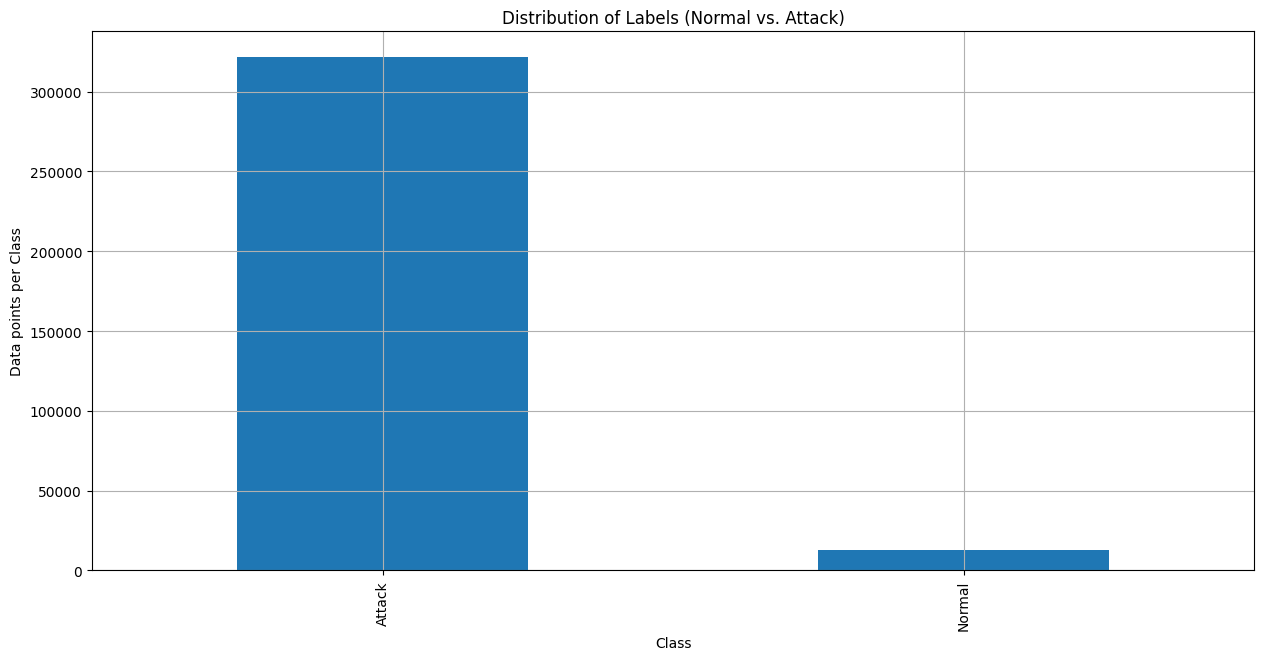

In [ ]:
# Exploratory data analysis, This code generates a bar plot that shows the distribution of different output labels in the dataset.

import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plt.figure(figsize=(15,7)) #width of 15 inches and height 7 inches
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Labels (Normal vs. Attack)')
plt.grid()
plt.show()

In [ ]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
def encode_text_dummy(df, column_name):
    """
    Converts categorical text column into dummy/one-hot encoded columns.
    """
    dummies = pd.get_dummies(df[column_name], prefix=column_name)  # Create dummy variables
    df.drop(column_name, axis=1, inplace=True)  # Drop original column
    df = pd.concat([df, dummies], axis=1)  # Add new dummy columns
    return df  # Return modified dataframe


In [ ]:
# Now encode the feature vector
import pandas as pd
import numpy as np


encode_numeric_zscore(df, 'Flow Duration')
encode_numeric_zscore(df, 'Total Fwd Packets')
encode_numeric_zscore(df, 'Total Backward Packets')
encode_numeric_zscore(df, 'Fwd Packet Length Max')
encode_numeric_zscore(df, 'Fwd Packet Length Min')
encode_numeric_zscore(df, 'Fwd Packet Length Mean')
encode_numeric_zscore(df, 'Fwd Packet Length Std')
encode_numeric_zscore(df, 'Fwd IAT Total')
encode_numeric_zscore(df, 'Fwd IAT Mean')
encode_numeric_zscore(df, 'Fwd IAT Std')
encode_numeric_zscore(df, 'Fwd IAT Max')
encode_numeric_zscore(df, 'Fwd IAT Min')
encode_numeric_zscore(df, 'Bwd IAT Total')
encode_numeric_zscore(df, 'Bwd IAT Mean')
encode_numeric_zscore(df, 'Bwd IAT Std')
encode_numeric_zscore(df, 'Fwd Packets/s')
encode_numeric_zscore(df, 'Bwd Packets/s')
encode_numeric_zscore(df, 'Packet Length Max')
encode_numeric_zscore(df, 'Packet Length Min')
encode_numeric_zscore(df, 'Packet Length Mean')
encode_numeric_zscore(df, 'Packet Length Std')
encode_numeric_zscore(df, 'Packet Length Variance')
encode_numeric_zscore(df, 'FIN Flag Count')
encode_numeric_zscore(df, 'SYN Flag Count')
encode_numeric_zscore(df, 'RST Flag Count')
encode_numeric_zscore(df, 'ACK Flag Count')
encode_numeric_zscore(df, 'URG Flag Count')
encode_numeric_zscore(df, 'CWE Flag Count')
encode_numeric_zscore(df, 'ECE Flag Count')
encode_numeric_zscore(df, 'Down/Up Ratio')
encode_numeric_zscore(df, 'Avg Packet Size')
encode_numeric_zscore(df, 'Avg Fwd Segment Size')
encode_numeric_zscore(df, 'Avg Bwd Segment Size')



# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural network

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_Encoded
10790,6,-0.969079,-0.123670,-0.186518,0,0,-0.755382,-0.072458,-0.604463,-0.897361,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal,1
10791,6,-1.084922,-0.209006,-0.186518,0,0,-0.755382,-0.072458,-0.604463,-0.897361,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal,1
10792,6,-1.084921,-0.209006,-0.186518,0,0,-0.755382,-0.072458,-0.604463,-0.897361,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal,1
10793,6,-1.084920,-0.209006,-0.186518,0,0,-0.755382,-0.072458,-0.604463,-0.897361,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal,1
10794,6,-1.084920,-0.209006,-0.186518,0,0,-0.755382,-0.072458,-0.604463,-0.897361,...,0.0,0.0,0,0,0.0,0.0,0,0,Normal,1


In [ ]:
# Convert to numpy - Classification

# Prepare the feature matrix (X)
# Drop only the 'Label' column
X = df.drop(['Label'], axis=1, errors='ignore').values
print("Shape of Feature Matrix (X):", X.shape)

# Prepare the target vector (y)
y = df['Label_Encoded'].values
print("Shape of Target Vector (y):", y.shape)

# verify the unique values in your target vector:
print("Unique values in target vector (y):", np.unique(y))

Shape of Feature Matrix (X): (334349, 75)
Shape of Target Vector (y): (334349,)
Unique values in target vector (y): [0 1]


In [ ]:
df.groupby('Label')['Label'].count()

,Label
Label,
Attack,321759
Normal,12590


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (250761, 75)
Shape of X_test: (83588, 75)
Shape of y_train: (250761,)
Shape of y_test: (83588,)


In [ ]:
pd.Series(y_train).nunique()

2

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

#X_train_resampled and y_train_resampled will be used to train the model

Shape of X_train before SMOTE: (250761, 75)
Shape of y_train before SMOTE: (250761,)
Shape of X_train after SMOTE: (482638, 75)
Shape of y_train after SMOTE: (482638,)


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights from the resampled data
weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_train_resampled),
                                             y=y_train_resampled)

class_weights = dict(enumerate(weights))
class_weights[0] = class_weights[0] * 2
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(2.0), 1: np.float64(1.0)}


In [ ]:
pd.Series(y_train_resampled).value_counts()

,count
0,241319
1,241319


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of Scaled X_train:", X_train_scaled.shape)
print("Shape of Scaled X_test:", X_test_scaled.shape)

Shape of Scaled X_train: (250761, 75)
Shape of Scaled X_test: (83588, 75)


In [ ]:

X_train_resampled_reshaped = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)

print("Shape of X_train_resampled_reshaped:", X_train_resampled_reshaped.shape)

Shape of X_train_resampled_reshaped: (482638, 75, 1)


In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Shape of X_test_reshaped:", X_test_reshaped.shape)

Shape of X_test_reshaped: (83588, 75, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Check the number of unique classes in your y variables
num_classes = len(np.unique(y_train_resampled))

y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

print("Shape of y_train_resampled_encoded:", y_train_resampled_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of y_train_resampled_encoded: (482638, 2)
Shape of y_test_encoded: (83588, 2)


In [ ]:
print("Shape of X_train_resampled_reshaped before fit:", X_train_resampled_reshaped.shape)
print("Shape of X_test_reshaped before fit:", X_test_reshaped.shape)
print("Shape of y_train_resampled before fit:", y_train_resampled.shape)
print("Shape of y_test before fit:", y_test.shape)

Shape of X_train_resampled_reshaped before fit: (482638, 75, 1)
Shape of X_test_reshaped before fit: (83588, 75, 1)
Shape of y_train_resampled before fit: (482638,)
Shape of y_test before fit: (83588,)


In [ ]:
import pandas as pd
original_class_counts = pd.Series(y_train).value_counts()
print("Original Class Counts in y_train:\n", original_class_counts)

Original Class Counts in y_train:
 0    241319
1      9442
Name: count, dtype: int64


training the neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

def create_CNN_model(input_shape):
    model = Sequential()
    # First Conv1D layer
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    # Second Conv1D layer
    model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    # Flatten layer
    model.add(Flatten())
    # Dense layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
  # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model


# Get the input shape
input_shape = (X_train_resampled_reshaped.shape[1], 1)
# Create the enhanced model
CNN_model = create_CNN_model(input_shape)
# Compile the model
optimizer = Adam(learning_rate=0.0001)
CNN_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


# Train the enhanced model with class weights
CNN_model = CNN_model.fit(
    X_train_resampled_reshaped, y_train_resampled,
    validation_data=(X_test_reshaped, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - AUC: 0.7111 - accuracy: 0.6884 - loss: 16624.3379 - val_AUC: 0.7517 - val_accuracy: 0.9648 - val_loss: 0.6550
Epoch 2/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - AUC: 0.6302 - accuracy: 0.5459 - loss: 3.9988 - val_AUC: 0.5491 - val_accuracy: 0.9658 - val_loss: 0.5854
Epoch 3/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - AUC: 0.5423 - accuracy: 0.5361 - loss: 1.5429 - val_AUC: 0.5218 - val_accuracy: 0.9638 - val_loss: 0.4291
Epoch 4/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - AUC: 0.5248 - accuracy: 0.5207 - loss: 1.8388 - val_AUC: 0.5261 - val_accuracy: 0.9641 - val_loss: 0.4325
Epoch 5/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - AUC: 0.5232 - accuracy: 0.5207 - loss: 1.1527 - val_AUC: 0.5421 - val_accuracy: 0.9653 - val_loss: 0.4753
Epoch 6/20
15083/15083 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - AUC: 0.5353 - accuracy: 0.5331 - loss: 1.1055 - val_AUC: 0.5407 - val_accuracy: 0.9654 - val_loss: 0.4089
Epoch 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test data
y_pred_probs = CNN_model.model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

# Overall Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification Report (per-class)
print("\nClassification Report (Per-Class):")
from sklearn.metrics import classification_report
# Generate classification report with class names
report = classification_report(y_test, y_pred, target_names=['Attack', 'Normal'])
print(report)

2613/2613 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Overall Metrics:
Accuracy: 0.9654
Precision: 0.9826
Recall: 0.5407
F1-Score: 0.5664

Classification Report (Per-Class):
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     80440
      Normal       1.00      0.08      0.15      3148

    accuracy                           0.97     83588
   macro avg       0.98      0.54      0.57     83588
weighted avg       0.97      0.97      0.95     83588



2613/2613 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


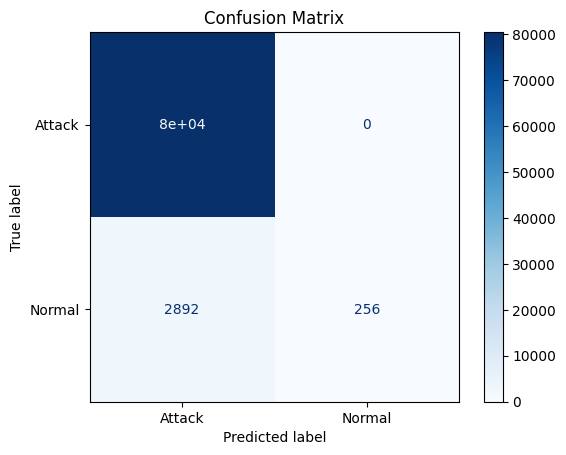

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the test set using CNN_model.model
y_pred_probs = CNN_model.model.predict(X_test_reshaped)  # Changed to CNN_model.model
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Attack', 'Normal'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import tensorflow.keras.backend as K

# Access the optimizer from the model
optimizer = CNN_model.model.optimizer

# Get the learning rate
learning_rate = K.eval(optimizer.learning_rate)

print('Learning Rate - ')
print(learning_rate)
print('='*50)
CNN_model.model.summary()

Learning Rate - 
1e-04


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 71, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 35, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 31, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,543,557 (13.52 MB)

 Trainable params: 1,181,185 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,362,372 (9.01 MB)

In [ ]:
import tensorflow as tf
import tarfile
import os

# Save the model with the .keras extension
CNN_model.model.save('cnn_model.keras')

# Create a tar.gz archive
tar_file_path = 'cnn_model.tar.gz'
with tarfile.open(tar_file_path, "w:gz") as tar:
    tar.add('cnn_model.keras', arcname=os.path.basename('cnn_model.keras'))

print(f"✅ Model successfully saved as {tar_file_path}")

✅ Model successfully saved as cnn_model.tar.gz


In [ ]:
from google.colab import files

# Download the tar.gz file
files.download('cnn_model.tar.gz')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>